<a href="https://colab.research.google.com/github/sitinatazha/K-Means/blob/main/Project_Gigih_CPI_DA_SDG_8_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**Tourism Sector Development in Indonesian Based on K-means Method**

This project will analyze the potential region for the development of the tourism sector. In the analysis, the cluster used K-Means to identify potential region for development in the tourism sector. The project is expected to help in decision-making related to the potential region for development in the tourism sector in Indonesia.

# **Exploratory Data Analysis**

Datasets source used to build the dataframe on the below:
- [Tourist Attraction Object Statistics](https://www.bps.go.id/publication/2023/05/18/f1511face611270ed812cd2d/statistik-objek-daya-tarik-wisata-2021.html)
- [Labor Force Situation in Indonesia](https://www.bps.go.id/publication/2021/12/07/ee355feea591c3b6841d361b/keadaan-angkatan-kerja-di-indonesia-agustus-2021.html)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/Data Capstone GIGIH(8).xlsx')

In [ ]:
df

,Province,Visitors,Workers,Unemployment,Revenue,Tourism
0,Aceh,741049,469,103898,11491.83,28
1,Sumatera Utara,3057775,2032,312122,77053.59,163
2,Sumatera Barat,2129323,969,109468,38105.44,64
3,Riau,640704,438,127295,12788.18,42
4,Jambi,306119,175,54256,3265.08,12
5,Sumatera Selatan,785252,438,166111,17234.75,29
6,Bengkidu,258222,309,23398,4529.12,23
7,Lampung,626132,319,142357,13849.14,36
8,Kep. Bangka Belitung,1064913,472,22974,13075.53,40
9,Kepulauan Riau,302024,139,85283,14621.75,16


In [ ]:
df.describe()

,Visitors,Workers,Unemployment,Revenue,Tourism
count,3.400000e+01,34.000000,3.400000e+01,34.000000,34.000000
mean,2.665328e+06,1268.088235,1.638459e+05,57462.541765,75.382353
std,6.574977e+06,2137.862815,2.828801e+05,100687.777274,111.318276
min,4.324400e+04,66.000000,1.095300e+04,879.550000,5.000000
25%,1.872058e+05,165.000000,3.645650e+04,3747.770000,16.250000
50%,5.582425e+05,322.500000,6.407750e+04,12140.005000,25.500000
75%,1.796853e+06,686.750000,1.385915e+05,36156.862500,60.000000
max,3.658751e+07,7757.000000,1.499233e+06,330083.800000,414.000000


Based on descriptive statistics, there are information from **Tourist Attraction Object Statistics** and **Labor Force Situation in Indonesia** publication from **Statistic Indonesia**.

1. Average `visitors` of Commercial Tourist Attraction Objects in Indonesia are 2665328 people. The least `visitors` are 43244 in *North Maluku Province* and most `visitors` are 36587512 in *Central Java Province*.
2. Average `workers` of Commercial Tourist Attraction Objects in Indonesia are 1268 people. The least `workers` are 66 in *West Papua Province* and most `workers` are 7757 in *Central Java Province*.
3. Average `unemployment` in Indonesia are 163845 people. The least `unemployment` are 10953 in *North Kalimantan Province* and most `unemployment` are 1499233 in *West Java Province*.
4. Average `revenue` of Commercial Tourist Attraction Objects in Indonesia is 57.462 million Rupiah. The least `revenue` is 879 thousand Rupiah in *North Kalimantan Province* and most `revenue` is 330.083 million Rupiah in *Jakarta Province*.
5. Average `tourism` of Commercial Tourist Attraction Objects in Indonesia are 75. The least `tourism` are 5 in *North Maluku Province* and most `tourism` are 414 in *West Java Province*.

# **Standardization**

Using `StandardScaler` give some advantages:

**Normal Distribution**
- *Advantage:* StandardScaler assumes that the distribution of the data is normal or close to normal.
- *Benefit:* Many machine learning models make assumptions about the normality of the input data. Standardizing the features helps in meeting these assumptions and can improve the performance of certain models.

**Compatibility with Algorithms**
- *Advantage:* Many machine learning algorithms, especially those based on distances or gradients (e.g., k-nearest neighbors, k-means, gradient descent), perform better when features are standardized.
- *Benefit:* StandardScaler ensures that the input features are on a similar scale, improving the convergence and performance of these algorithms.




In [ ]:
sc = StandardScaler()

In [ ]:
# Transform the data using standard scaler
df1 = pd.DataFrame(sc.fit_transform(df[['Visitors', 'Workers', 'Unemployment', 'Revenue', 'Tourism']]))

# Rename the columns from the transform result based on dataset
df1 = pd.DataFrame(df1).rename(columns={0:"Visitors", 1:"Workers", 2:"Unemployment", 3:"Revenue", 4:"Tourism"})

In [ ]:
df1

,Visitors,Workers,Unemployment,Revenue,Tourism
0,-0.297068,-0.379400,-0.215107,-0.463433,-0.432049
1,0.060586,0.362699,0.532049,0.197498,0.798928
2,-0.082748,-0.142004,-0.195120,-0.195140,-0.103788
3,-0.312559,-0.394119,-0.131153,-0.450364,-0.304392
4,-0.364212,-0.518989,-0.393233,-0.546367,-0.577942
5,-0.290244,-0.394119,0.008128,-0.405538,-0.422930
6,-0.371607,-0.455367,-0.503959,-0.533624,-0.477640
7,-0.314809,-0.450619,-0.077107,-0.439669,-0.359102
8,-0.247070,-0.377976,-0.505480,-0.447468,-0.322628
9,-0.364844,-0.536081,-0.281901,-0.431880,-0.541469


### **Correlation**

Look at the correlation of each variable to know whether it is good or bad to use in clustering. Based on [Correlation Reference](http://www.databee.id/2020/12/jenis-uji-korelasi.html), the variables are good to use in clustering.

In [ ]:
display(df1.corr())

,Visitors,Workers,Unemployment,Revenue,Tourism
Visitors,1.000000,0.827541,0.569697,0.733907,0.756671
Workers,0.827541,1.000000,0.778108,0.932009,0.975623
Unemployment,0.569697,0.778108,1.000000,0.672303,0.846707
Revenue,0.733907,0.932009,0.672303,1.000000,0.873542
Tourism,0.756671,0.975623,0.846707,0.873542,1.000000


# **Clustering**

### **K-Means**

##### Elbow Method

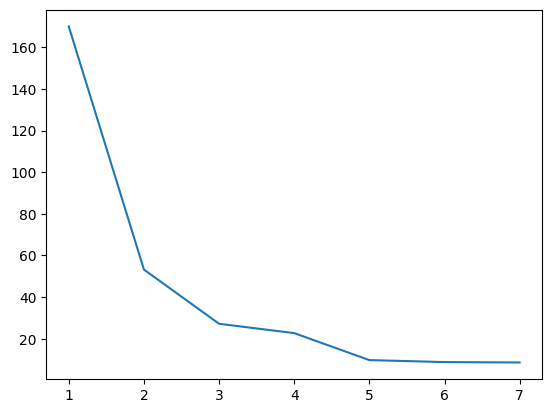

In [ ]:
iterasi = []
nklaster = list(range(1,8))

for n in nklaster:
    km = KMeans(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    km.fit(df1)
    iterasi.append(km.inertia_)

plt.plot(nklaster, iterasi)

##### Silhouette Method

In [ ]:
!gdown --id '15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l'
from silhoutte import silhoutte_analysis

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 14.2MB/s]


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='random', n_init=10, max_iter=500, random_state=42)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7997275961052077
For n_clusters=3, the silhouette score is 0.7303737547193404
For n_clusters=4, the silhouette score is 0.682368664287735
For n_clusters=5, the silhouette score is 0.6832353735445967
For n_clusters=6, the silhouette score is 0.4343413338018521
For n_clusters=7, the silhouette score is 0.4072878983662953
For n_clusters=8, the silhouette score is 0.2833979229026402


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7303737547193404


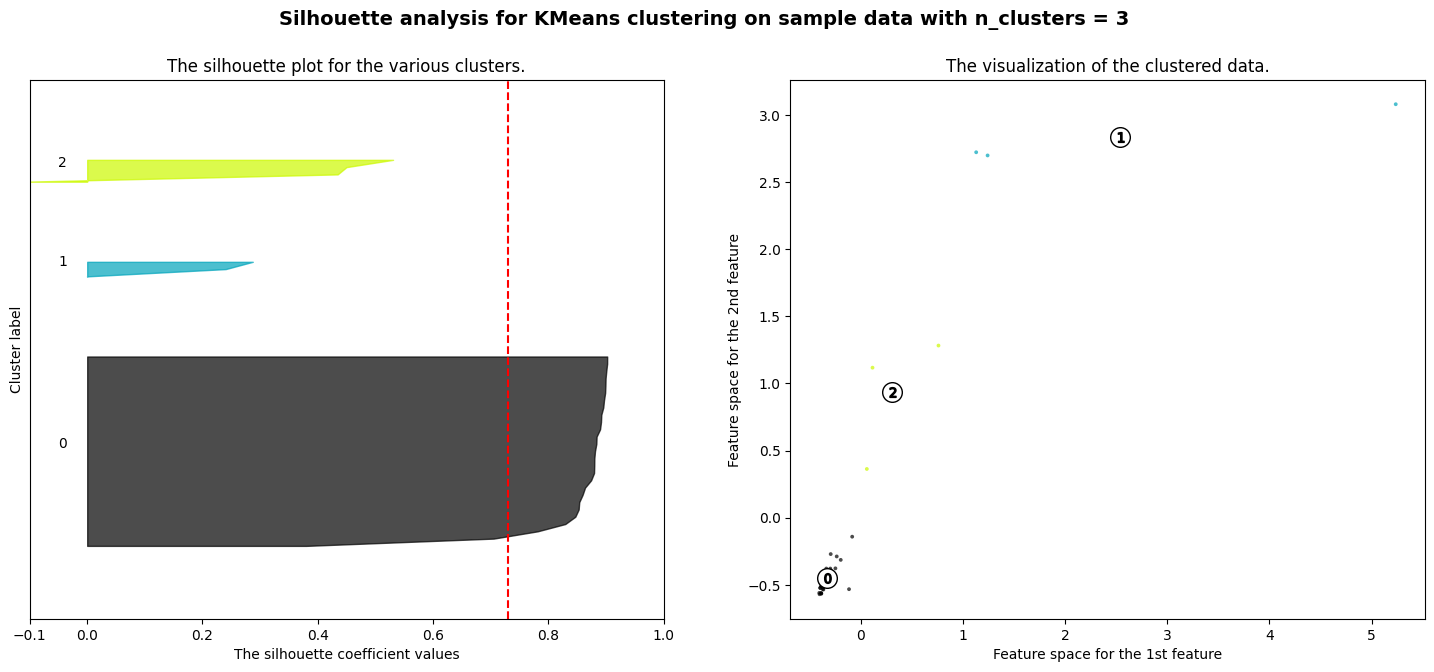

In [ ]:
silhoutte_analysis(df1,list(range(3,4)))

##### Clustering

Based on the *Elbow and Silhouette* method, using `number of k = 2` is too simple. Therfore, the project using `number of k = 3`.

Here are some reason to use `number of k = 3`:

**Simplicity in Regional Classification:**

- *Advantage:* A smaller value of `k` simplifies the classification of regions.
- *Benefit:* It may be easier to categorize regions into three distinct clusters, which could represent different levels of tourism potential such as high, middle, and low.

**Resource Allocation:**

- *Advantage*: A smaller number of clusters facilitates resource allocation.
- *Benefit*: It becomes more manageable to allocate resources, investments, and marketing efforts based on the identified potential of each cluster.

**Strategic Planning:**

- *Advantage*: It simplifies strategic planning for tourism development.
- *Benefit*: Organizations can develop strategic plans with specific goals and initiatives for each cluster, leading to more effective and targeted development efforts.

In [ ]:
# K-Means model with k=3
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)
kmeans.fit(df1)

# Place the cluster result into the dataset
df['Cluster'] = kmeans.labels_

In [ ]:
# Count the value in each of the cluster
df['Cluster'].value_counts()

2    27
1     4
0     3
Name: Cluster, dtype: int64

### **Display some Cluster Result (Correlation with `Tourism`)**

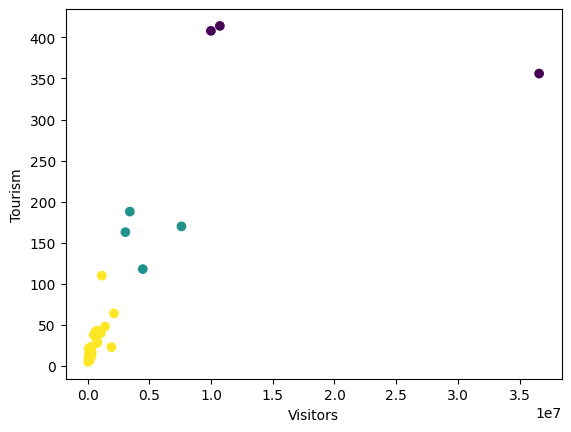

In [ ]:
plt.scatter('Visitors', 'Tourism', c='Cluster', data=df)

plt.xlabel('Visitors')
plt.ylabel('Tourism')
plt.show()

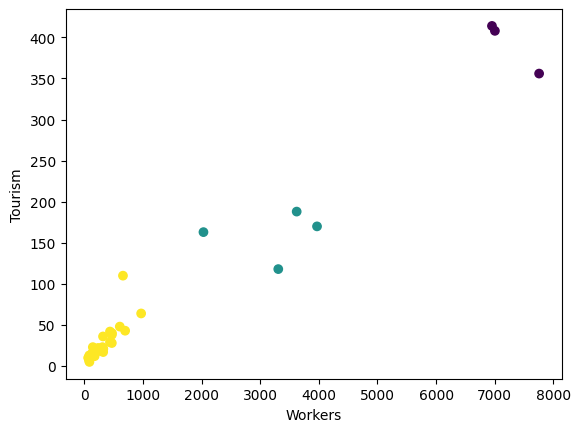

In [ ]:
plt.scatter('Workers', 'Tourism', c='Cluster', data=df)

plt.xlabel('Workers')
plt.ylabel('Tourism')
#plt.title('The Example of the Cluster Result')
plt.show()

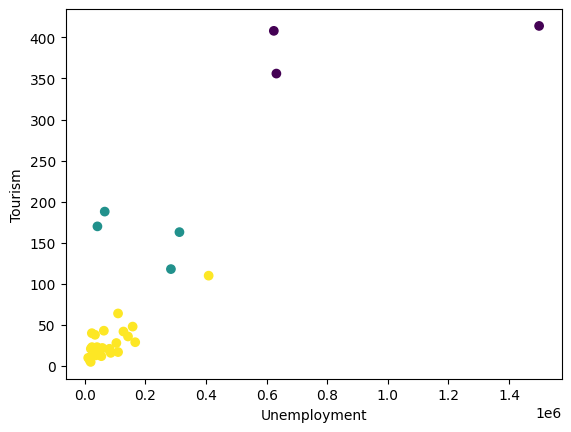

In [ ]:
plt.scatter('Unemployment', 'Tourism', c='Cluster', data=df)

plt.xlabel('Unemployment')
plt.ylabel('Tourism')
plt.show()

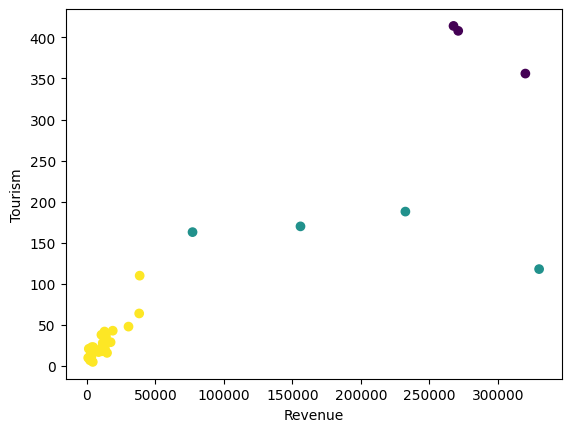

In [ ]:
plt.scatter('Revenue', 'Tourism', c='Cluster', data=df)

plt.xlabel('Revenue')
plt.ylabel('Tourism')
plt.show()

### **Grouping Result**

In [ ]:
# Grouping by cluster and province to see the detail of the result
df.groupby(['Cluster', 'Province'])['Visitors', 'Workers', 'Unemployment', 'Revenue', 'Tourism'].max()

<ipython-input-24-726c71adece5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Cluster', 'Province'])['Visitors', 'Workers', 'Unemployment', 'Revenue', 'Tourism'].max()


Visitors  Workers  Unemployment    Revenue  \
Cluster Province                                                           
0       Jawa Barat            10713306     6953       1499233  267602.90   
        Jawa Timur             9989713     7003        623647  271017.80   
        Jawa lengah           36587512     7757        632079  320052.60   
1       Bali                   3417668     3622         65521  232455.90   
        DI Yogyakarta          7599627     3969         41427  155870.30   
        DKI Jakarta            4467061     3308        284010  330083.80   
        Sumatera Utara         3057775     2032        312122   77053.59   
2       Aceh                    741049      469        103898   11491.83   
        Banten                 1148595      659        408508   38458.08   
        Bengkidu                258222      309         23398    4529.12   
        Gorontalo               169378       81         16238    2236.46   
        Jambi                   306119      175         54256    3265.08   
        Kalimantan Barat        326880      321        109540    8498.10   
        Kalimantan Selatan      272441      324         81350   13123.61   
        Kalimantan Tengah       490353      469         33429   10527.48   
        Kalimantan Timur        152578      191         81251    6708.00   
        Kalimantan Utara        169609       73         10953     879.55   
        Kep. Bangka Belitung   1064913      472         22974   13075.53   
        Kepulauan Riau          302024      139         85283   14621.75   
        Lampung                 626132      319        142357   13849.14   
        Maluku                  159971       85         36407    2471.12   
        Maluku Utara             43244       87         19139    4217.33   
        Nusa Tenggara Barat     766935      696         62634   18791.19   
        Nusa tenggara Timur     130001      235         57695   10706.70   
        Papua                  1928274      145         40035    3471.18   
        Papua Barat              59862       66         17150    1666.32   
        Riau                    640704      438        127295   12788.18   
        Sulawesi Barat           96914      165         19588    1321.62   
        Sulawesi Selatan       1402591      605        157678   30311.13   
        Sulawesi Tengah         111553      165         36605    3591.25   
        Sulawesi Utara          239996      230         48828   10764.28   
        Sulawesi lenggara       265570      146         40652    2885.31   
        Sumatera Barat         2129323      969        109468   38105.44   
        Sumatera Selatan        785252      438        166111   17234.75   

                              Tourism  
Cluster Province                       
0       Jawa Barat                414  
        Jawa Timur                408  
        Jawa lengah               356  
1       Bali                      188  
        DI Yogyakarta             170  
        DKI Jakarta               118  
        Sumatera Utara            163  
2       Aceh                       28  
        Banten                    110  
        Bengkidu                   23  
        Gorontalo                   7  
        Jambi                      12  
        Kalimantan Barat           17  
        Kalimantan Selatan         21  
        Kalimantan Tengah          38  
        Kalimantan Timur           19  
        Kalimantan Utara           10  
        Kep. Bangka Belitung       40  
        Kepulauan Riau             16  
        Lampung                    36  
        Maluku                     13  
        Maluku Utara                5  
        Nusa Tenggara Barat        43  
        Nusa tenggara Timur        22  
        Papua                      23  
        Papua Barat                10  
        Riau                       42  
        Sulawesi Barat             21  
        Sulawesi Selatan           48  
        Sulawesi Tengah            15  
        Sulaw

Grouping by cluster to calculate the average and know the province in low, middle, and high potential for the development of the tourism sector in Indonesia

In [ ]:
df.groupby(['Cluster'])['Visitors', 'Workers', 'Unemployment', 'Revenue', 'Tourism'].mean()

<ipython-input-25-a26b0654dda5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Cluster'])['Visitors', 'Workers', 'Unemployment', 'Revenue', 'Tourism'].mean()


,Visitors,Workers,Unemployment,Revenue,Tourism
Cluster,,,,,
0,1.909684e+07,7237.666667,918319.666667,286224.433333,392.666667
1,4.635533e+06,3232.750000,175770.000000,198865.897500,159.750000
2,5.477216e+05,313.740741,78248.888889,11095.908519,27.629630


# **Conclusion**


1. **Cluster 0** has *high potential* for the development of the tourism sector in Indonesia because it has the highest average in all of the variables. The province in this potential are West Java, Central Java, and East Java.
2. **Cluster 1** has *middle potential* for the development of the tourism sector in Indonesia because it has the medium average in all of the variables. The province in this potential are Bali, DI Yogyakarta, Jakarta, and North Sumatera.
3. **Cluster 2** has *low potential* for the development of the tourism sector in Indonesia because it has the lowest average in all of the variables. The province which aren't mention in another cluster has *low potential* for the development of the tourism sector in Indonesia.